# 진동운동

진동운동에 대해 다룬다.

우선 import와 설정부터 하자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from differential_equation import rk2_algorithm

%matplotlib inline

## 단진동운동
조화 진동자를 예를 들어 설명해 보자. (사실 저번시간에 했던거 다시하고있다.)

우선 다음과 같은 식들이 성립하는것은 다들 알 것이다.

$$
F = -kx
$$

$$
\ddot{x} + \frac{k}{m}x = 0
$$

따라서 이를 풀면

$$
x = A\cos(\omega t + \phi)
$$

임을 알 수 있다. (여기서 $\omega = \sqrt{\frac{k}{m}}$이고, $A$는 처음에 용수철을 잡아당긴 길이이다.)

이를 코드로 나타내어 보자.

In [2]:
def simple_harmonic(y, t):
    k = 50
    m = 200
    a = (-k / m) * y[0]
    v = y[1]
    return np.array([v, a])

이제 그러면 미분방정식을 풀어서 실제로 어떻게 운동하는지 살펴보자.

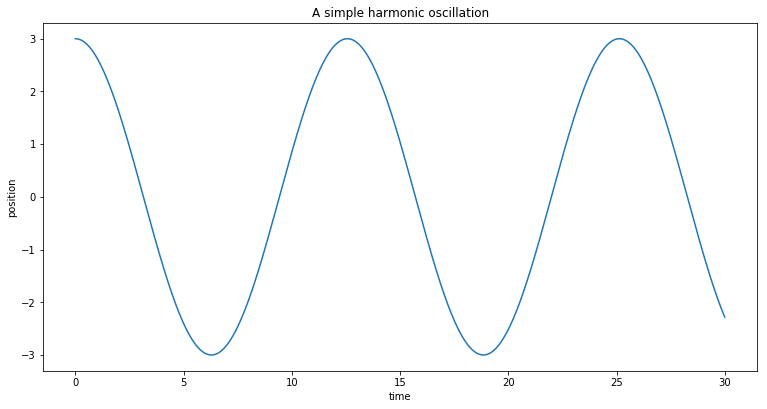

In [3]:
solution1 = rk2_algorithm(simple_harmonic, 0, 30, np.array([3, 0]), 1000)
plt.figure(figsize=(12.8, 6.4))
plt.plot(solution1[1], solution1[0][:,0], '-')
plt.title('A simple harmonic oscillation')
plt.xlabel('time')
plt.ylabel('position')
plt.show()

## 감쇠진동
감쇠력이 추가되는 진동운동이다.

$$
m\ddot{x} + c\dot{x} + kx = 0
$$

In [4]:
c = 20
def damped_harmonic(y, t):
    k = 50
    m = 200
    a = (c * y[1] + k * y[0]) / -m
    v = y[1]
    return np.array([v, a])

방금 전처럼 미분방정식을 풀어보자.

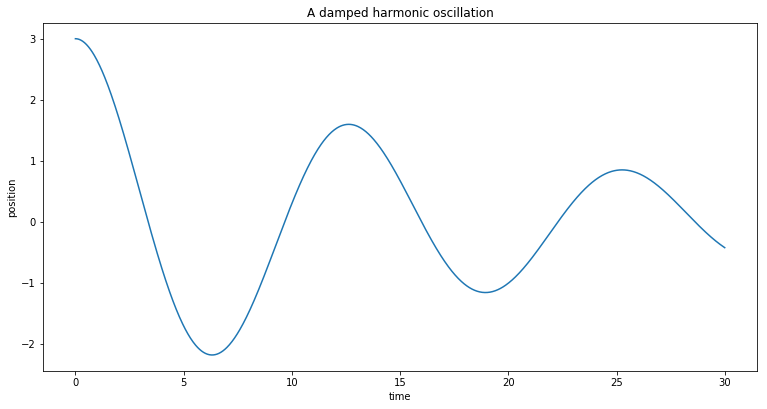

In [5]:
solution2 = rk2_algorithm(damped_harmonic, 0, 30, np.array([3, 0]), 1000)
plt.figure(figsize=(12.8, 6.4))
plt.plot(solution2[1], solution2[0][:,0], '-')
plt.title('A damped harmonic oscillation')
plt.xlabel('time')
plt.ylabel('position')
plt.show()

감쇠력에 따라 어떻게 바뀔까?

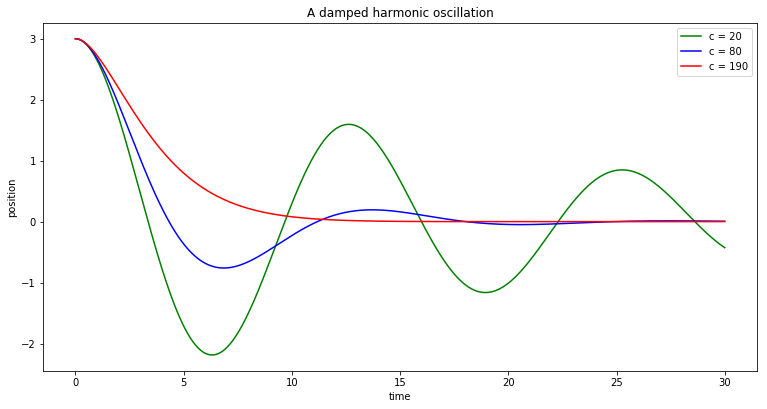

In [6]:
c = 20
solution2_1 = rk2_algorithm(damped_harmonic, 0, 30, np.array([3, 0]), 1000)
c = 80
solution2_2 = rk2_algorithm(damped_harmonic, 0, 30, np.array([3, 0]), 1000)
c = 190
solution2_3 = rk2_algorithm(damped_harmonic, 0, 30, np.array([3, 0]), 1000)
plt.figure(figsize=(12.8, 6.4))
plt.plot(solution2_1[1], solution2_1[0][:,0], 'g-', label='c = 20')
plt.plot(solution2_2[1], solution2_2[0][:,0], 'b-', label='c = 80')
plt.plot(solution2_3[1], solution2_3[0][:,0], 'r-', label='c = 190')
plt.title('A damped harmonic oscillation')
plt.xlabel('time')
plt.ylabel('position')
plt.legend(loc='best')
plt.show()

감쇠력이 클수록 0점으로 빠르게 돌아가는 것을 알 수 있다.

## 강제진동운동
강제진동에서 운동 방정식은 다음과 같다.

$$
m\ddot{x} + c\dot{x} + kx = F_0\cos{\omega t}
$$

In [7]:
def driven_harmonic(y, t):
    k = 200
    c = 10
    m = 50
    w = 5
    F = 500
    a = (F * np.cos(w * t) - c * y[1] - k * y[0]) / m
    v = y[1]
    return np.array([v, a])

미분방정식을 풀먼 어떻게 될까? <strike>고만해 이 미친것아</strike>

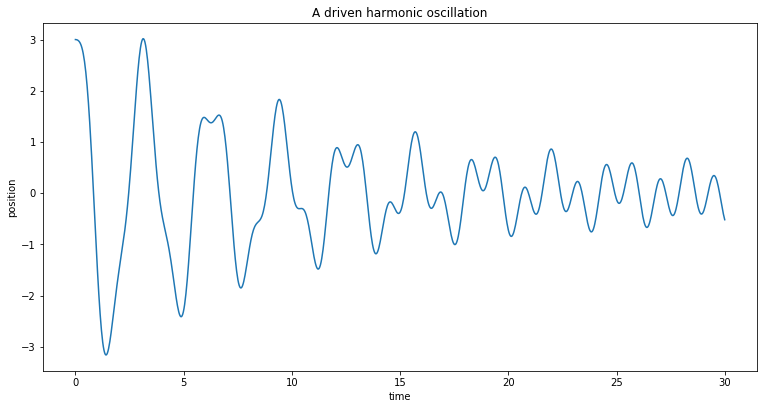

In [8]:
solution3 = rk2_algorithm(driven_harmonic, 0, 30, np.array([3, 0]), 1000)
plt.figure(figsize=(12.8, 6.4))
plt.plot(solution3[1], solution3[0][:,0], '-')
plt.title('A driven harmonic oscillation')
plt.xlabel('time')
plt.ylabel('position')
plt.show()